In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
survey_df= pd.read_csv('survey_results_public.csv')
pd.set_option('display.max_columns', 35)
survey_df.head(6)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,...,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,...,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,"Developer, front-end",100 to 499 employees,I have some influence,Investigate,...,Strongly disagree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,"Developer, full-stack",20 to 99 employees,I have some influence,Investigate,...,Strongly agree,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,"Developer, back-end",100 to 499 employees,I have little or no influence,NaN,...,Strongly agree,Disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Disagree,Disagree,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor diffic

In [3]:
print("Shape of the Survey Data set: ",survey_df.shape)

Shape of the Survey Data set:  (89184, 84)


In [4]:
survey_df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


## DATA CLEANING

In [5]:
survey_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

Need to shorten the data to work on some specific portions. So I'll have to drop some columns, which I will not use later

In [6]:
drop_columns= ['Q120','ResponseId', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm',
       'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen',
       'AIToolInterested in Using', 'AIToolCurrently Using',
       'AIToolNot interested in Using', 'AINextVery different',
       'AINextNeither different nor similar', 'AINextSomewhat similar',
       'AINextVery similar', 'AINextSomewhat different', 'TBranch', 'ICorPM', 
       'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
       'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching',
       'TimeAnswering', 'ProfessionalTech', 'Industry', 'SurveyLength',
       'SurveyEase', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'BuyNewTool', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', "PurchaseInfluence", "TechList"]

survey_df.drop(drop_columns, axis=1, inplace=True)

# also dropping the 0th row bcz it has all nan values
survey_df.drop([0], inplace=True)

In [7]:
print(survey_df.columns,end='\n \n')
print("Shape:",survey_df.shape)

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'OpSysPersonal use', 'WorkExp',
       'ConvertedCompYearly'],
      dtype='object')
 
Shape: (89183, 29)


In [8]:
survey_df.head(5)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OpSysPersonal use,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,10.0,285000.0
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,MacOS;Other Linux-based,23.0,250000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,"Developer, front-end",100 to 499 employees,United States of America,USD\tUnited States dollar,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,iOS;iPadOS;MacOS,7.0,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,"Developer, full-stack",20 to 99 employees,Philippines,PHP\tPhilippine peso,1320000.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Docker;npm;Webpack;Yarn,Docker;npm;Yarn,Other (Please Specify):,6.0,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,78000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,NaN,Amazon Web Services (AWS);Cloudflare;Go

In [9]:
survey_df['Employment'].value_counts()

Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work                                                                                                              

In [10]:
# this is not giving me the clear picture and the count of each division so i need to arrange the data in the list manner

In [11]:
# function to organize columns (series of lists)
def organiseItems(col):
    newList=[]
    for item in col:
        if item=="NaN":
            newList.append(list())
        else:
            newList.append(item.split(';'))
    
    return newList

In [12]:
# replacing the null values with unemployed in employment colm
survey_df['Employment'].fillna("Not employed, and not looking for work", inplace=True)

In [13]:
# updating the vlaues of the employment column
survey_df['Employment'] = organiseItems(survey_df['Employment'])
survey_df.head(5)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OpSysPersonal use,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,10.0,285000.0
2,I am a developer by profession,45-54 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,MacOS;Other Linux-based,23.0,250000.0
3,I am a developer by profession,25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,"Developer, front-end",100 to 499 employees,United States of America,USD\tUnited States dollar,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,iOS;iPadOS;MacOS,7.0,156000.0
4,I am a developer by profession,25-34 years old,"[Employed, full-time, Independent contractor, ...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,"Developer, full-stack",20 to 99 employees,Philippines,PHP\tPhilippine peso,1320000.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Docker;npm;Webpack;Yarn,Docker;npm;Yarn,Other (Please Specify):,6.0,23456.0
5,I am a developer by profession,35-44 years old,"[Employed, full-time]",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,78000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,NaN,Amazon Web Services (AWS);Cloud

In [14]:
# Now finding the categorical value count in the employement column
employment_Dict={}
for item in survey_df['Employment']:
    for i in item:
        if i in employment_Dict:
            employment_Dict[i]+=1
        else:
            employment_Dict[i]=1

for i in employment_Dict:
    print(i,": ",employment_Dict[i], end='\n')

Employed, full-time :  60899
Independent contractor, freelancer, or self-employed :  13988
Not employed, but looking for work :  4178
Student, full-time :  11768
Employed, part-time :  5029
Student, part-time :  3390
Not employed, and not looking for work :  2665
I prefer not to say :  549
Retired :  737


In [15]:
# Now this is much organised way to see individually how many times each option is select by respondant

In [16]:
# survey_df.loc[survey_df["Employment"] == ["Unemployed"]]
# for further cleaning i need to know that is there any weird guy who is unemployed and working as remote (maybe filled form wrongly) or maybe nan in
# his/her case means he/she don't want to share their data of employment

# filter_condition = lambda x:"Unemployed" in x
# survey_df[survey_df['Employment'].apply(filter_condition)].head()
# with this we can see that all unemployed are actually unemployed so our decision of making nan values to unemplyoed is kinda right


Now implementing the above pattern in all the required categorical columns

In [17]:
# renaming some columns
survey_df.rename(columns={"CompTotal":"AnnualCompensation", "OpSysPersonal use":"OperatingSysUse"}, inplace=True)

In [18]:
# replacing the null values with string None in several column to convert the series of objects to series of lists

print("Null values in our dataset:\n",survey_df.isnull().sum())
li=["CodingActivities", "EdLevel", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "LanguageHaveWorkedWith", 
    "LanguageWantToWorkWith", "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith",
    "WebframeHaveWorkedWith", "WebframeWantToWorkWith", "OperatingSysUse", "ToolsTechWantToWorkWith", "ToolsTechHaveWorkedWith"]

# replacing the the null values with None as string. nan->"None"
survey_df.update(survey_df[li].fillna("None"))

# organising the data accordingly
for item in li:
    survey_df[item] = organiseItems(survey_df[item])

Null values in our dataset:
 MainBranch                     0
Age                            0
Employment                     0
RemoteWork                 15373
CodingActivities           15419
EdLevel                     1210
LearnCode                   1520
LearnCodeOnline            19099
LearnCodeCoursesCert       52107
YearsCode                   1748
YearsCodePro               23047
DevType                    12311
OrgSize                    24140
Country                     1210
Currency                   23849
AnnualCompensation         40958
LanguageHaveWorkedWith      2043
LanguageWantToWorkWith      8474
DatabaseHaveWorkedWith     15748
DatabaseWantToWorkWith     28272
PlatformHaveWorkedWith     25555
PlatformWantToWorkWith     37875
WebframeHaveWorkedWith     22245
WebframeWantToWorkWith     32442
ToolsTechHaveWorkedWith    11299
ToolsTechWantToWorkWith    20868
OperatingSysUse             2626
WorkExp                    45604
ConvertedCompYearly        41164
dtype: int64


In [19]:
print("Null values in our dataset:\n",survey_df.isnull().sum())

Null values in our dataset:
 MainBranch                     0
Age                            0
Employment                     0
RemoteWork                 15373
CodingActivities               0
EdLevel                        0
LearnCode                      0
LearnCodeOnline                0
LearnCodeCoursesCert           0
YearsCode                   1748
YearsCodePro               23047
DevType                    12311
OrgSize                    24140
Country                     1210
Currency                   23849
AnnualCompensation         40958
LanguageHaveWorkedWith         0
LanguageWantToWorkWith         0
DatabaseHaveWorkedWith         0
DatabaseWantToWorkWith         0
PlatformHaveWorkedWith         0
PlatformWantToWorkWith         0
WebframeHaveWorkedWith         0
WebframeWantToWorkWith         0
ToolsTechHaveWorkedWith        0
ToolsTechWantToWorkWith        0
OperatingSysUse                0
WorkExp                    45604
ConvertedCompYearly        41164
dtype: int64


In [20]:
print("Numeric columns:",survey_df.select_dtypes(include=['int64', 'float64' ]).columns)

Numeric columns: Index(['AnnualCompensation', 'WorkExp', 'ConvertedCompYearly'], dtype='object')


In [21]:

survey_df["YearsCodePro"].replace("Less than 1 year", "0", inplace=True)
survey_df["YearsCodePro"].replace("More than 50 years", "55", inplace=True)
survey_df['YearsCode'].replace("More than 50 years", "60", inplace=True)
survey_df['YearsCode'].replace("Less than 1 year", "0", inplace=True)
# convert some of the object columns to int to process further like columns with years of code and professionaly coding years
# survey_df= survey_df.astype({"YearsCodePro":int, "YearsCode":int})
survey_df['YearsCode']= survey_df['YearsCode'].astype('float')
survey_df["YearsCodePro"]= survey_df['YearsCodePro'].astype('float')

print("Numeric columns:", survey_df.select_dtypes(include=['int64', 'float64' ]).columns)

Numeric columns: Index(['YearsCode', 'YearsCodePro', 'AnnualCompensation', 'WorkExp',
       'ConvertedCompYearly'],
      dtype='object')


In [22]:
# replacing numeric nan values with 0
survey_df.update(survey_df[['YearsCode', "YearsCodePro", "AnnualCompensation", "ConvertedCompYearly"]].fillna(0))
# replacing nan values in devType with none in string
survey_df.update(survey_df[["DevType", "RemoteWork"]].fillna("None"))
survey_df['OrgSize'].fillna("0", inplace=True)
survey_df.isnull().sum()

MainBranch                     0
Age                            0
Employment                     0
RemoteWork                     0
CodingActivities               0
EdLevel                        0
LearnCode                      0
LearnCodeOnline                0
LearnCodeCoursesCert           0
YearsCode                      0
YearsCodePro                   0
DevType                        0
OrgSize                        0
Country                     1210
Currency                   23849
AnnualCompensation             0
LanguageHaveWorkedWith         0
LanguageWantToWorkWith         0
DatabaseHaveWorkedWith         0
DatabaseWantToWorkWith         0
PlatformHaveWorkedWith         0
PlatformWantToWorkWith         0
WebframeHaveWorkedWith         0
WebframeWantToWorkWith         0
ToolsTechHaveWorkedWith        0
ToolsTechWantToWorkWith        0
OperatingSysUse                0
WorkExp                    45604
ConvertedCompYearly            0
dtype: int64

In [23]:
# checking data of work exp colmn in relation to other column to fill nan values...

survey_df[['YearsCode','YearsCodePro', 'WorkExp']].loc[~survey_df['WorkExp'].isnull()]

,YearsCode,YearsCodePro,WorkExp
1,18.0,9.0,10.0
2,27.0,23.0,23.0
3,12.0,7.0,7.0
4,6.0,4.0,6.0
5,21.0,21.0,22.0
...,...,...,...
89174,5.0,1.0,2.0
89175,10.0,8.0,8.0
89177,17.0,11.0,12.0
89178,25.0,22.0,22.0


We can see that work experience is closely related to year code pro, so insted of filling na values with median or any other central tendencies we should fill the nan values with their respective year code pro number.

In [24]:
# replacing the workExp nan values with the corresponding yearscodepro values
survey_df['WorkExp'] = survey_df['WorkExp'].fillna(survey_df['YearsCodePro'])
survey_df.isnull().sum()

MainBranch                     0
Age                            0
Employment                     0
RemoteWork                     0
CodingActivities               0
EdLevel                        0
LearnCode                      0
LearnCodeOnline                0
LearnCodeCoursesCert           0
YearsCode                      0
YearsCodePro                   0
DevType                        0
OrgSize                        0
Country                     1210
Currency                   23849
AnnualCompensation             0
LanguageHaveWorkedWith         0
LanguageWantToWorkWith         0
DatabaseHaveWorkedWith         0
DatabaseWantToWorkWith         0
PlatformHaveWorkedWith         0
PlatformWantToWorkWith         0
WebframeHaveWorkedWith         0
WebframeWantToWorkWith         0
ToolsTechHaveWorkedWith        0
ToolsTechWantToWorkWith        0
OperatingSysUse                0
WorkExp                        0
ConvertedCompYearly            0
dtype: int64

In [25]:
survey_df.loc[survey_df['Currency'].isnull()].head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,AnnualCompensation,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSysUse,WorkExp,ConvertedCompYearly
9,I am a developer by profession,25-34 years old,"[Not employed, but looking for work]",None,[None],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Online Courses or Cer...",[Formal documentation provided by the owner of...,"[edX, Udemy, Pluralsight, Coursera, Udacity]",6.0,0.0,"Developer, full-stack",0,India,NaN,0.0,"[HTML/CSS, Java, JavaScript, Python, SQL, Type...","[HTML/CSS, JavaScript, TypeScript]","[Cloud Firestore, MongoDB, MySQL, PostgreSQL, ...","[Cloud Firestore, Firebase Realtime Database, ...","[Amazon Web Services (AWS), Firebase, Google C...","[Cloudflare, Firebase, Google Cloud, IBM Cloud...","[Angular, Express, NestJS, React]","[Deno, Express, FastAPI, Fastify, NestJS, Qwik...","[Docker, npm, Vite, Webpack, Yarn]","[Docker, npm, Podman, Vite, Webpack, Yarn]","[Fedora, Other Linux-based, Ubuntu, Windows, W...",0.0,0.0
35,I code primarily as a hobby,35-44 years old,"[Employed, full-time]",In-person,[Hobby],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Friend or family memb...",[Formal documentation provided by the owner of...,[Udemy],5.0,0.0,Educator,0,United Kingdom of Great Britain and Northern I...,NaN,0.0,"[Bash/Shell (all shells), C, HTML/CSS, Java, J...","[Bash/Shell (all shells), C, Rust]",[None],[None],[None],[None],[None],[None],"[Cargo, Gradle, Maven (build tool), npm, Pip]",[Cargo],[MacOS],0.0,0.0
46,I am learning to code,25-34 years old,"[Student, full-time]",None,[None],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, Online Cou...","[Books, Recorded coding sessions, How-to video...",[Udemy],3.0,0.0,None,0,Sweden,NaN,0.0,"[C#, HTML/CSS, JavaScript, PHP, PowerShell, SQ...","[C#, HTML/CSS, JavaScript, PowerShell, Python,...","[MongoDB, MySQL]","[Cloud Firestore, MongoDB, MySQL]","[Firebase, Google Cloud, Microsoft Azure, Netl...","[Amazon Web Services (AWS), Digital Ocean, Fir...","[Angular, AngularJS, Blazor, Express, Next.js,...","[Angular, AngularJS, Blazor, Express, Next.js,...","[Docker, npm, NuGet, Unity 3D, Unreal Engine, ...","[Docker, npm, NuGet, Unity 3D, Unreal Engine, ...","[ChromeOS, iOS, Other Linux-based, Ubuntu, Win...",0.0,0.0
47,I code primarily as a hobby,55-64 years old,"[Independent contractor, freelancer, or self-e...",Remote,[I don’t code outside of work],[Some college/university study without earning...,"[Books / Physical media, Other online resource...",[Formal documentation provided by the owner of...,[None],30.0,0.0,Research & Development role,0,Germany,NaN,0.0,"[HTML/CSS, JavaScript, Kotlin, PHP]","[HTML/CSS, JavaScript, Kotlin, PHP]","[H2, MariaDB, MySQL]","[MariaDB, MySQL]",[None],[None],[None],[None],[None],[None],[MacOS],0.0,0.0
49,I am a developer by profession,25-34 years old,"[Independent contractor, freelancer, or self-e...","Hybrid (some remote, some in-person)",[Hobby],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Friend or family member, On the job training,...",[Formal documentation provided by the owner of...,[None],15.0,0.0,"Developer, full-stack",0,Australia,NaN,0.0,"[HTML/CSS, JavaScript, PHP, TypeScript]","[HTML/CSS, Rust, TypeScript]","[MariaDB, MongoDB, MySQL]","[MariaDB, MongoDB, PostgreSQL]","[Cloudflare, Digital Ocean]","[Cloudflare, Digital Ocean]","[jQuery, Node.js, Svelte, Vue.js, WordPress]","[Node.js, Svelte, Vue.js, WordPress]","[Cargo, Docker, npm]",[Cargo],[Arch],0.0,0.0


In [26]:
survey_df.loc[survey_df['Country'].isnull()].head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,AnnualCompensation,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSysUse,WorkExp,ConvertedCompYearly
70,None of these,45-54 years old,"[Not employed, and not looking for work]",None,[None],[None],[None],[None],[None],0.0,0.0,None,0,NaN,NaN,0.0,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],0.0,0.0
304,None of these,18-24 years old,"[Not employed, and not looking for work]",None,[None],[None],[None],[None],[None],0.0,0.0,None,0,NaN,NaN,0.0,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],0.0,0.0
733,None of these,45-54 years old,"[Not employed, and not looking for work]",None,[None],[None],[None],[None],[None],0.0,0.0,None,0,NaN,NaN,0.0,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],0.0,0.0
875,None of these,45-54 years old,"[Not employed, and not looking for work]",None,[None],[None],[None],[None],[None],0.0,0.0,None,0,NaN,NaN,0.0,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],0.0,0.0
914,None of these,18-24 years old,"[Not employed, and not looking for work]",None,[None],[None],[None],[None],[None],0.0,0.0,None,0,NaN,NaN,0.0,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],0.0,0.0


In [27]:
# as we can see that almost all the values in the record is null where the country is not provided so we need to delete those records to get the
# clean and better understanding of data

survey_df.drop(survey_df[survey_df["Country"].isnull()].index, inplace=True)

In [28]:
print("shape:",survey_df.shape)
survey_df.isnull().sum()

shape: (87973, 29)


MainBranch                     0
Age                            0
Employment                     0
RemoteWork                     0
CodingActivities               0
EdLevel                        0
LearnCode                      0
LearnCodeOnline                0
LearnCodeCoursesCert           0
YearsCode                      0
YearsCodePro                   0
DevType                        0
OrgSize                        0
Country                        0
Currency                   22639
AnnualCompensation             0
LanguageHaveWorkedWith         0
LanguageWantToWorkWith         0
DatabaseHaveWorkedWith         0
DatabaseWantToWorkWith         0
PlatformHaveWorkedWith         0
PlatformWantToWorkWith         0
WebframeHaveWorkedWith         0
WebframeWantToWorkWith         0
ToolsTechHaveWorkedWith        0
ToolsTechWantToWorkWith        0
OperatingSysUse                0
WorkExp                        0
ConvertedCompYearly            0
dtype: int64

we can see that currency column has 22639 null values, however those null values won't affect our analysis because that corresponding records has value equals to 0 in thieir annual compensation and converted compensation columns. So those records are basically earning 0 or say unemplyoed. I haven't removed those records because rest of the data is useful and we can perform analysis using that. 

In [29]:
survey_df.head(5)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,AnnualCompensation,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSysUse,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,"[Hobby, Contribute to open-source projects, Bo...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,[Other],18.0,9.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,USD\tUnited States dollar,285000.0,"[HTML/CSS, JavaScript, Python]","[Bash/Shell (all shells), C#, Dart, Elixir, GD...",[Supabase],"[Firebase Realtime Database, Supabase]","[Amazon Web Services (AWS), Netlify, Vercel]","[Fly.io, Netlify, Render]","[Next.js, React, Remix, Vue.js]","[Deno, Elm, Nuxt.js, React, Svelte, Vue.js]","[Docker, Kubernetes, npm, Pip, Vite, Webpack, ...","[Godot, npm, pnpm, Unity 3D, Unreal Engine, Vi...","[iOS, iPadOS, MacOS, Windows, Windows Subsyste...",10.0,285000.0
2,I am a developer by profession,45-54 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,[None],27.0,23.0,"Developer, back-end","5,000 to 9,999 employees",United States of America,USD\tUnited States dollar,250000.0,"[Bash/Shell (all shells), Go]","[Haskell, OCaml, Rust]",[None],[None],"[Amazon Web Services (AWS), Google Cloud, Open...",[None],[None],[None],"[Cargo, Docker, Kubernetes, Make, Nix]","[Cargo, Kubernetes, Nix]","[MacOS, Other Linux-based]",23.0,250000.0
3,I am a developer by profession,25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Colleague, Friend or family member, Other onl...",[Formal documentation provided by the owner of...,[None],12.0,7.0,"Developer, front-end",100 to 499 employees,United States of America,USD\tUnited States dollar,156000.0,"[Bash/Shell (all shells), HTML/CSS, JavaScript...","[Bash/Shell (all shells), HTML/CSS, JavaScript...","[PostgreSQL, Redis]","[PostgreSQL, Redis]","[Cloudflare, Heroku]","[Cloudflare, Heroku]","[Node.js, React, Ruby on Rails, Vue.js, WordPr...","[Node.js, Ruby on Rails, Vue.js]","[Homebrew, npm, Vite, Webpack, Yarn]","[Homebrew, npm, Vite]","[iOS, iPadOS, MacOS]",7.0,156000.0
4,I am a developer by profession,25-34 years old,"[Employed, full-time, Independent contractor, ...",Remote,"[Hobby, Contribute to open-source projects, Pr...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Online Courses or Cer...",[Formal documentation provided by the owner of...,"[Other, Codecademy, edX]",6.0,4.0,"Developer, full-stack",20 to 99 employees,Philippines,PHP\tPhilippine peso,1320000.0,"[HTML/CSS, JavaScript, TypeScript]","[HTML/CSS, JavaScript, Python, Rust, TypeScript]","[BigQuery, Elasticsearch, MongoDB, PostgreSQL]","[Elasticsearch, MongoDB, PostgreSQL, Redis, Su...","[Amazon Web Services (AWS), Firebase, Heroku, ...","[Amazon Web Services (AWS), Cloudflare, Digita...","[Express, Gatsby, NestJS, Next.js, Node.js, Re...","[Express, NestJS, Next.js, Node.js, React, Rem...","[Docker, npm, Webpack, Yarn]","[Docker, npm, Yarn]",[Other (Please Specify):],6.0,23456.0
5,I am a developer by profession,35-44 years old,"[Employed, full-time]",Remote,"[Hobby, Professional development or self-paced...",[Some college/university study without earning...,"[Books / Physical media, Colleague, Online Cou...",[Formal documentation provided by the ow

Now since our data is not in form of dictionary of list or series, (as it is in form of dictionary of series of series) values count function will not work thus I need my own customized values count function to get the values.

In [30]:
def countingValues(anyColumn):
    valuesDict={}
    for item in anyColumn:
        for i in item:
            if i in valuesDict:
                valuesDict[i]+=1
            else:
                valuesDict[i]=1

    return valuesDict

employment_Dict= countingValues(survey_df['Employment'])

for i in employment_Dict:
    print(i,": ",employment_Dict[i], end='\n')

Employed, full-time :  60899
Independent contractor, freelancer, or self-employed :  13988
Not employed, but looking for work :  4178
Student, full-time :  11768
Employed, part-time :  5029
Student, part-time :  3390
I prefer not to say :  549
Retired :  737
Not employed, and not looking for work :  1455


This works on Employment column, lets check on another column to make sure it works fine on other columns as well

In [31]:
educationLevel= countingValues(survey_df['EdLevel'])
for i in educationLevel:
    print(i,": ",educationLevel[i], end='\n')

Bachelor’s degree (B.A., B.S., B.Eng., etc.) :  36706
Some college/university study without earning a degree :  11753
Master’s degree (M.A., M.S., M.Eng., MBA, etc.) :  20543
Primary/elementary school :  1905
Professional degree (JD, MD, Ph.D, Ed.D, etc.) :  3887
Associate degree (A.A., A.S., etc.) :  2807
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.) :  8897
Something else :  1475


In [32]:
survey_df['Age'].value_counts()

25-34 years old       32963
35-44 years old       20314
18-24 years old       17672
45-54 years old        8209
Under 18 years old     4029
55-64 years old        3327
65 years or older      1130
Prefer not to say       329
Name: Age, dtype: int64

Adding a age column so that we have more flexibility with numeric data

In [33]:
medianAge = []
for i in survey_df['Age']:
    if(i=="Prefer not to say"):
        medianAge.append(np.nan)
    elif (i[0:2]=="65"):
        medianAge.append(65)
    elif (i[0]=='U'):
        medianAge.append(17)
    else:
        a= i[0:2]
        b= i[3:5]
        age= int((int(a)+int(b))/2)
        medianAge.append(age)

survey_df.insert(2, 'MedianAge', medianAge, True)


In [34]:
# rplacing the null values with the median of the age
survey_df['MedianAge'] = survey_df['MedianAge'].fillna(survey_df["WorkExp"])
# cheching for the replacement
(survey_df['MedianAge']==np.nan).sum()


0

In [35]:
# making a employment status column so that we can easily make some employment analysis
employment_status=[]

def empStatus(emp):
    for i in emp:
        if (('Not employed, but looking for work' in i ) or ('I prefer not to say' in i) or ('Not employed, and not looking for work' in i)):
            employment_status.append("Unemployed")
        elif 'Student, full-time' in i:
            employment_status.append("Student")
        elif 'Retired' in i:
            employment_status.append("Retired")
        else:
            employment_status.append("Employed")

empStatus(survey_df['Employment'])

survey_df.insert(4, "EmploymentStatus", employment_status)


In [36]:
survey_df.describe()

,MedianAge,YearsCode,YearsCodePro,AnnualCompensation,WorkExp,ConvertedCompYearly
count,87973.000000,87973.000000,87973.000000,8.797300e+04,87973.000000,8.797300e+04
mean,32.538313,13.917554,8.452559,5.683562e+41,9.183954,5.628139e+04
std,10.967271,10.717933,9.388347,1.685758e+44,9.763757,5.060465e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,29.000000,6.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
50%,29.000000,10.000000,6.000000,3.600000e+04,6.000000,1.399800e+04
75%,39.000000,20.000000,13.000000,1.260000e+05,14.000000,8.042500e+04
max,65.000000,60.000000,55.000000,5.000000e+46,55.000000,7.435143e+07


## EXPLORATORY DATA ANALYSIS

In [37]:
survey_df.head(3)

,MainBranch,Age,MedianAge,Employment,EmploymentStatus,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,AnnualCompensation,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSysUse,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,29.0,"[Employed, full-time]",Employed,Remote,"[Hobby, Contribute to open-source projects, Bo...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,[Other],18.0,9.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,USD\tUnited States dollar,285000.0,"[HTML/CSS, JavaScript, Python]","[Bash/Shell (all shells), C#, Dart, Elixir, GD...",[Supabase],"[Firebase Realtime Database, Supabase]","[Amazon Web Services (AWS), Netlify, Vercel]","[Fly.io, Netlify, Render]","[Next.js, React, Remix, Vue.js]","[Deno, Elm, Nuxt.js, React, Svelte, Vue.js]","[Docker, Kubernetes, npm, Pip, Vite, Webpack, ...","[Godot, npm, pnpm, Unity 3D, Unreal Engine, Vi...","[iOS, iPadOS, MacOS, Windows, Windows Subsyste...",10.0,285000.0
2,I am a developer by profession,45-54 years old,49.0,"[Employed, full-time]",Employed,"Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,[None],27.0,23.0,"Developer, back-end","5,000 to 9,999 employees",United States of America,USD\tUnited States dollar,250000.0,"[Bash/Shell (all shells), Go]","[Haskell, OCaml, Rust]",[None],[None],"[Amazon Web Services (AWS), Google Cloud, Open...",[None],[None],[None],"[Cargo, Docker, Kubernetes, Make, Nix]","[Cargo, Kubernetes, Nix]","[MacOS, Other Linux-based]",23.0,250000.0
3,I am a developer by profession,25-34 years old,29.0,"[Employed, full-time]",Employed,"Hybrid (some remote, some in-person)",[Hobby],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Colleague, Friend or family member, Other onl...",[Formal documentation provided by the owner of...,[None],12.0,7.0,"Developer, front-end",100 to 499 employees,United States of America,USD\tUnited States dollar,156000.0,"[Bash/Shell (all shells), HTML/CSS, JavaScript...","[Bash/Shell (all shells), HTML/CSS, JavaScript...","[PostgreSQL, Redis]","[PostgreSQL, Redis]","[Cloudflare, Heroku]","[Cloudflare, Heroku]","[Node.js, React, Ruby on Rails, Vue.js, WordPr...","[Node.js, Ruby on Rails, Vue.js]","[Homebrew, npm, Vite, Webpack, Yarn]","[Homebrew, npm, Vite]","[iOS, iPadOS, MacOS]",7.0,156000.0


In [38]:
countingValues(survey_df['CodingActivities'])

{'Hobby': 51942,
 'Contribute to open-source projects': 18231,
 'Bootstrapping a business': 10293,
 'Professional development or self-paced learning from online courses': 26957,
 'None': 14209,
 'I don’t code outside of work': 8809,
 'Freelance/contract work': 14258,
 'School or academic work': 8636,
 'Other (please specify):': 1182}

Let's find out how many people are from which branches some of the counting data visualization

C:\Users\thaku\AppData\Local\Temp\ipykernel_4464\233985652.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(["Developer", "Write code\n for work/study", "Learning to code", "Code as \nhobby", "Used to be \na developer"])


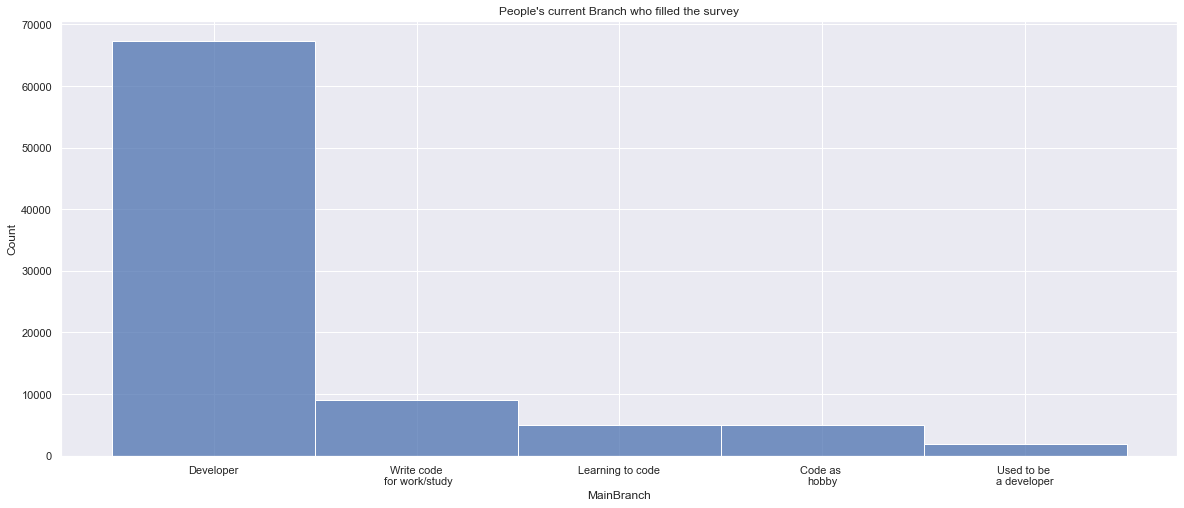

In [39]:

plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
graph=sns.histplot(data=survey_df, x=survey_df['MainBranch'])
graph.set_xticklabels(["Developer", "Write code\n for work/study", "Learning to code", "Code as \nhobby", "Used to be \na developer"])
plt.title("People's current Branch who filled the survey")
plt.show()

So, Now we know most of our audience who had attended surveys are developers and working professionals. Therefore, now we can perform various analysis according to that.

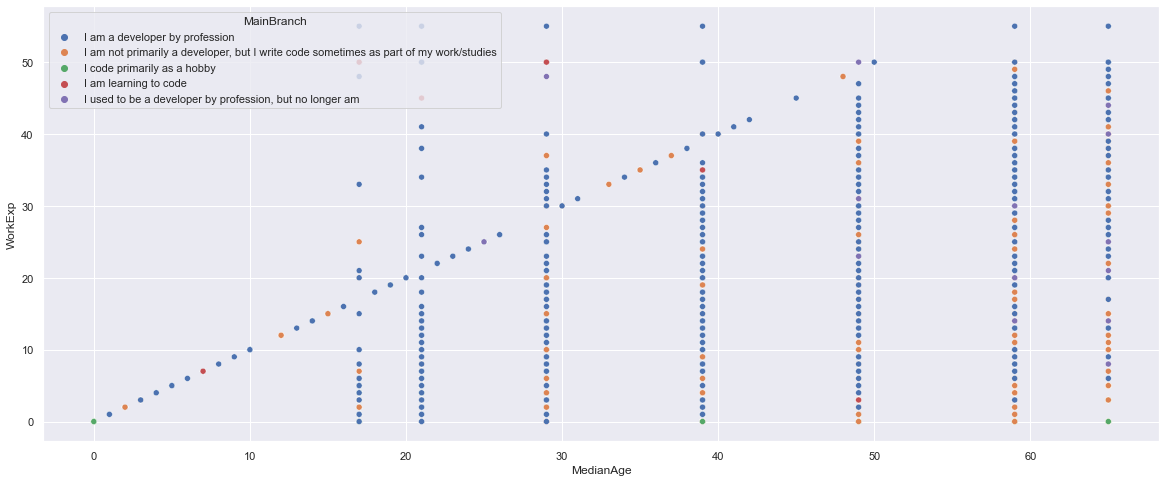

In [40]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=survey_df, x=survey_df['MedianAge'], y=survey_df['WorkExp'], hue=survey_df['MainBranch'])
plt.show()
# have to look into this there is some error as there are some records like age=17 and work exp=50 which is not possible

C:\Users\thaku\AppData\Local\Temp\ipykernel_4464\2042369941.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(["Employed,\nfull-time", "Freelancer", "Not employed,\nbut looking\n for work", "Student,\n full-time",


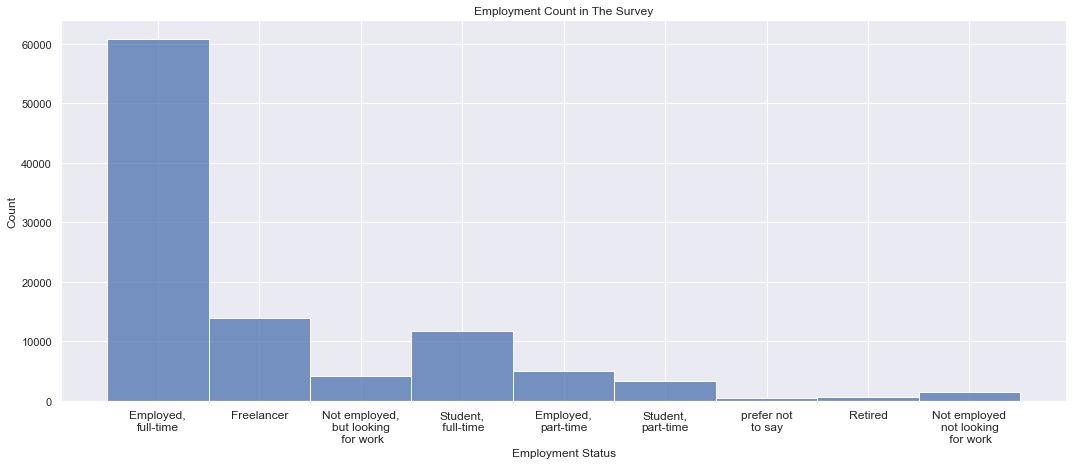

In [41]:

plt.figure(figsize=(18,7))
plt.xticks(fontsize=12)

flat_list = [item for sublist in survey_df['Employment'] for item in sublist]

graph= sns.histplot(flat_list)
graph.set_xticklabels(["Employed,\nfull-time", "Freelancer", "Not employed,\nbut looking\n for work", "Student,\n full-time",
             "Employed,\npart-time","Student,\npart-time", "prefer not\nto say", "Retired", "Not employed\nnot looking\n for work" ])
plt.title("Employment Count in The Survey")
plt.xlabel("Employment Status")
plt.show()




Now I want to know what are the age groups who take the most online courses, thus we can see where people are learning to code from most oftenly.

In [42]:
# function that will remove the records which have None in it.
def notNoneCheckBox(li):
    for i in li:
        return "None" not in i

(70084, 31)


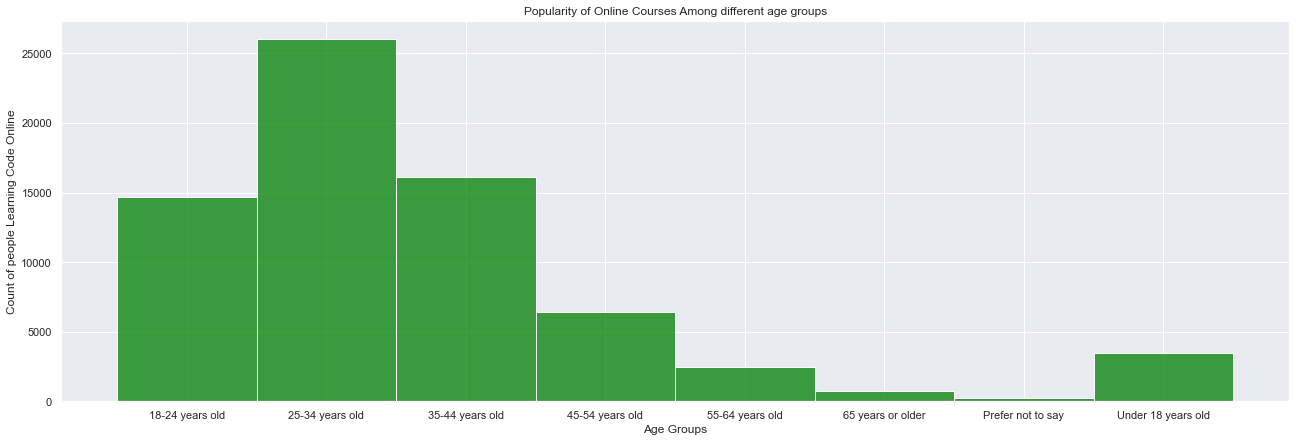

In [43]:
# making the sampleDf as the required dataset to plot the graph
sampleDf= survey_df[survey_df['LearnCodeOnline'].apply(notNoneCheckBox)]
print(sampleDf.shape)

plt.figure(figsize=(22,7))
sns.histplot(data=sampleDf, x=sorted(sampleDf['Age']), color="green")
plt.xlabel("Age Groups")
plt.ylabel("Count of people Learning Code Online")
plt.title("Popularity of Online Courses Among different age groups")
plt.show()

I've plotted the above graph as it contains all type of online learning things people take, I actually wanted to know what age groups are more interested and actively learning from online resourses. So, here we can see that age group of 25-34 are highliy taking advanteage of online resourses be it the documentation of tech owner or video resouses this age group is learning from every resourse, second place taken by age group of 35-44, and on third we have 18-24 the bachelor's students. So even if any company or individual want to advertise their online course or resources then this age group 18-44 is the best choice according to the survey.

In [44]:
survey_df.head(2)

,MainBranch,Age,MedianAge,Employment,EmploymentStatus,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,AnnualCompensation,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSysUse,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,29.0,"[Employed, full-time]",Employed,Remote,"[Hobby, Contribute to open-source projects, Bo...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,[Other],18.0,9.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,USD\tUnited States dollar,285000.0,"[HTML/CSS, JavaScript, Python]","[Bash/Shell (all shells), C#, Dart, Elixir, GD...",[Supabase],"[Firebase Realtime Database, Supabase]","[Amazon Web Services (AWS), Netlify, Vercel]","[Fly.io, Netlify, Render]","[Next.js, React, Remix, Vue.js]","[Deno, Elm, Nuxt.js, React, Svelte, Vue.js]","[Docker, Kubernetes, npm, Pip, Vite, Webpack, ...","[Godot, npm, pnpm, Unity 3D, Unreal Engine, Vi...","[iOS, iPadOS, MacOS, Windows, Windows Subsyste...",10.0,285000.0
2,I am a developer by profession,45-54 years old,49.0,"[Employed, full-time]",Employed,"Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,[None],27.0,23.0,"Developer, back-end","5,000 to 9,999 employees",United States of America,USD\tUnited States dollar,250000.0,"[Bash/Shell (all shells), Go]","[Haskell, OCaml, Rust]",[None],[None],"[Amazon Web Services (AWS), Google Cloud, Open...",[None],[None],[None],"[Cargo, Docker, Kubernetes, Make, Nix]","[Cargo, Kubernetes, Nix]","[MacOS, Other Linux-based]",23.0,250000.0


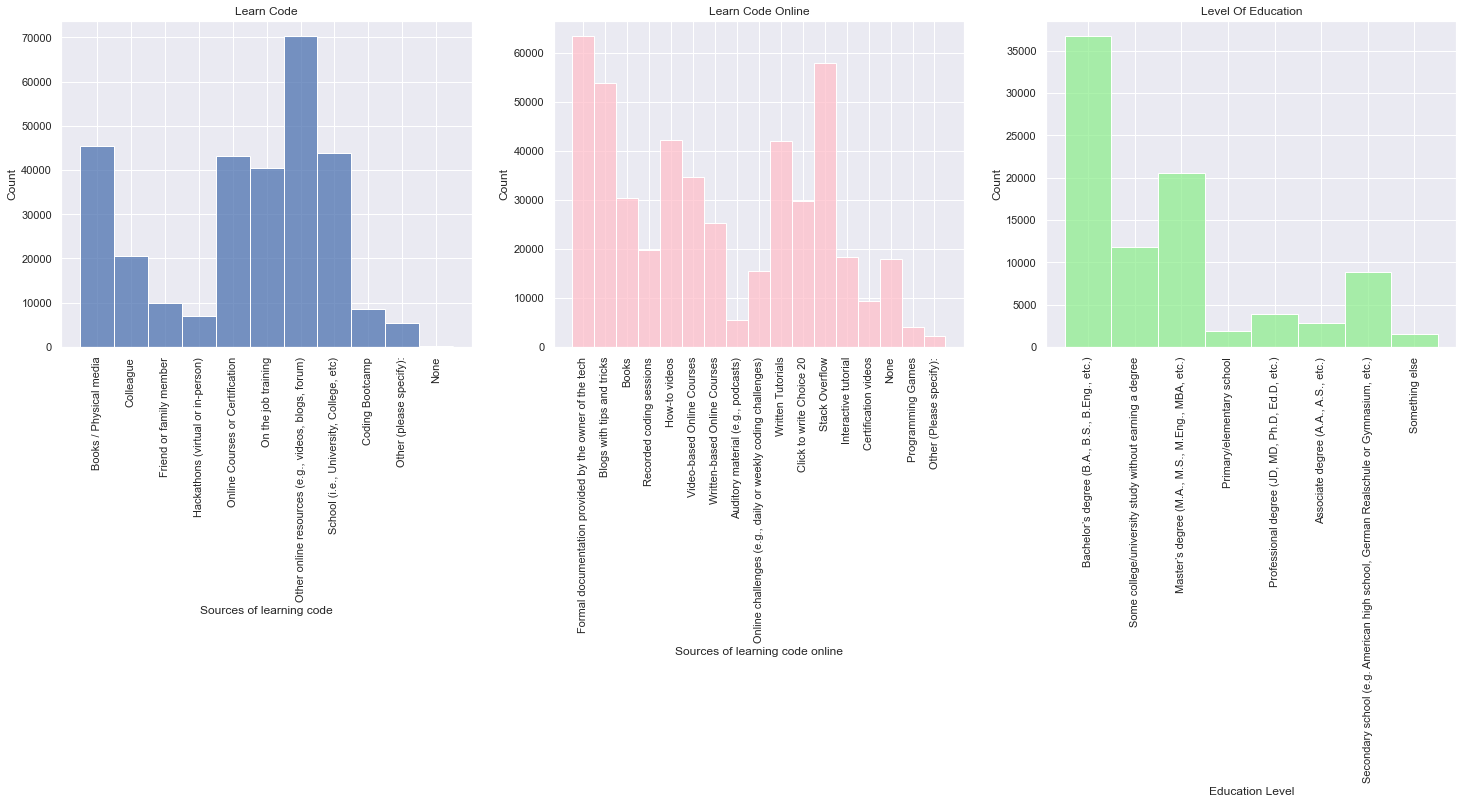

In [45]:

plt.figure(figsize=(25,6))
plt.subplot(1,3,1)

flat_list = [item for sublist in survey_df['LearnCode'] for item in sublist]

graph= sns.histplot(flat_list)
plt.title("Learn Code")
plt.xticks(rotation=90)
plt.xlabel("Sources of learning code")


plt.subplot(1,3,2)

flat_list = [item for sublist in survey_df['LearnCodeOnline'] for item in sublist]
plt.title("Learn Code Online")
graph= sns.histplot(flat_list, color="pink")
plt.xticks(rotation=90)
plt.xlabel("Sources of learning code online")

plt.subplot(1,3,3)

flat_list = [item for sublist in survey_df['EdLevel'] for item in sublist]
plt.title("Level Of Education")
graph= sns.histplot(flat_list, color="lightgreen")
plt.xticks(rotation=90)
plt.xlabel("Education Level")

plt.show()

with the above count display we can understand the interest of the majorities and how they learn coding. This is the best way to know which market we have to target if one is selling their course or some coding stuff. As the chances of the reach will be more in the major sections.

Similarly, I would like to show the count and popularity of various categories so that we have an idea where our majority audience resides

In [46]:
# fucntion to plot the groupped choices which users are working with currently

def histplotchoices(col1, xlabel, title):
    flat_list = [item for sublist in col1 for item in sublist]
    df= pd.DataFrame({col1.name:flat_list})

    value_c= df[col1.name].value_counts().sort_values(ascending=False)
    graph1= sns.histplot(data=value_c, x=value_c.keys(), y=value_c, color= "blue")

    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel("Count of people")
    plt.xlabel(xlabel)

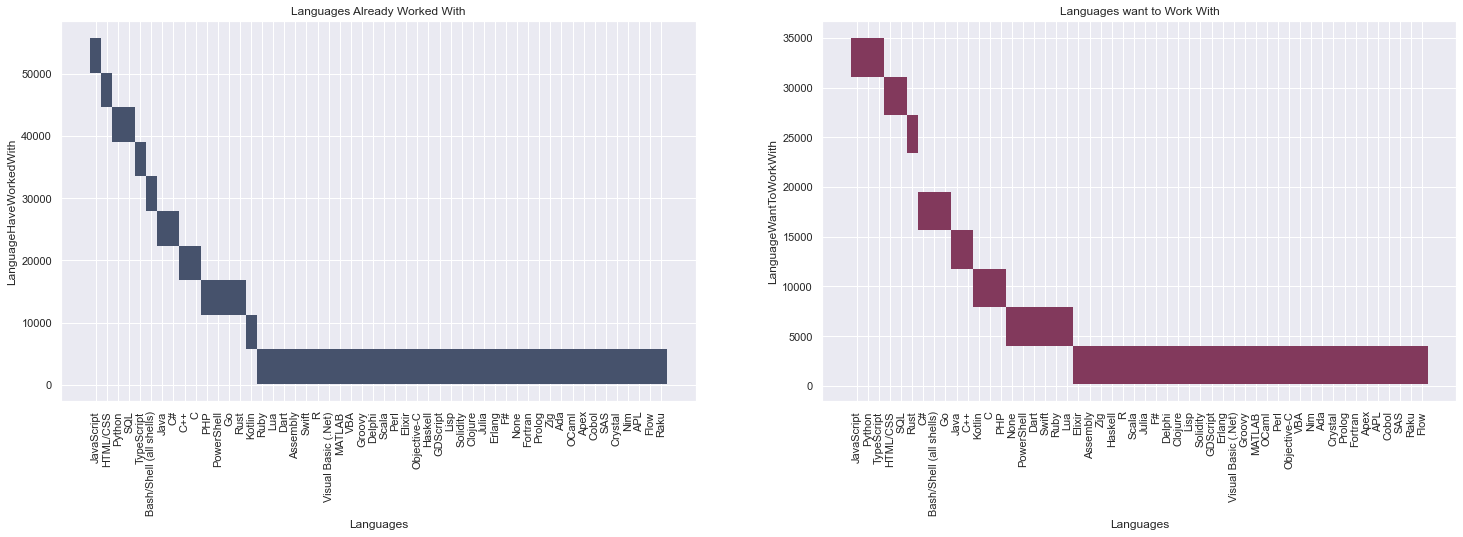

Text(0.5, 0, 'Languages')

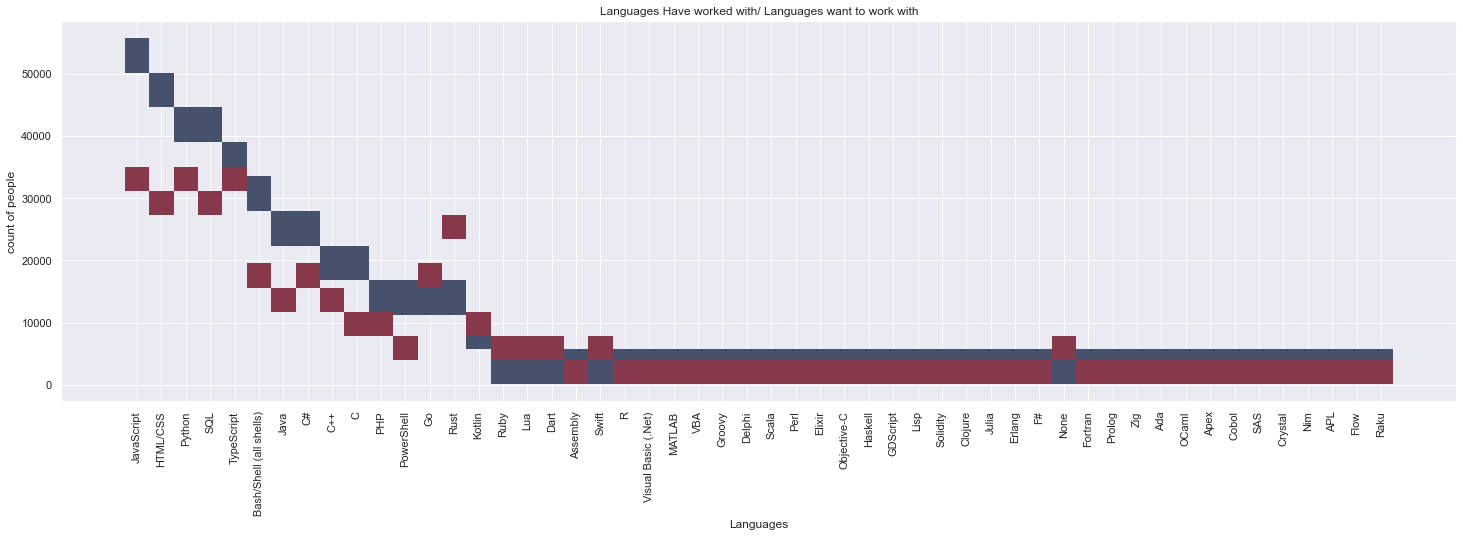

In [47]:

plt.figure(figsize=(25,7))

plt.subplot(1,2,1)

flat_list = [item for sublist in survey_df['LanguageHaveWorkedWith'] for item in sublist]
df= pd.DataFrame({"LanguageHaveWorkedWith":flat_list})

value_c= df["LanguageHaveWorkedWith"].value_counts().sort_values(ascending=False)
sns.histplot(data=value_c, x=value_c.keys(), y=value_c)
# graph= sns.histplot(data=value_c, x=df['LanguageHaveWorkedWith'], color="lightgrey")
plt.title("Languages Already Worked With")
plt.xticks(rotation=90)
plt.xlabel("Languages")


# ------------------------------------------
plt.subplot(1,2,2)
flat_list = [item for sublist in survey_df['LanguageWantToWorkWith'] for item in sublist]
df= pd.DataFrame({"LanguageWantToWorkWith":flat_list})

value_c= df['LanguageWantToWorkWith'].value_counts().sort_values(ascending=False)
graph= sns.histplot(data=value_c, x=value_c.keys(), y=value_c, color= "hotpink")

plt.title("Languages want to Work With")
plt.xticks(rotation=90)
plt.xlabel("Languages")

# -----------------------------------------
plt.show()
plt.figure(figsize=(25,7))

flat_list = [item for sublist in survey_df['LanguageHaveWorkedWith'] for item in sublist]
df= pd.DataFrame({"LanguageHaveWorkedWith":flat_list})
value_c= df["LanguageHaveWorkedWith"].value_counts().sort_values(ascending=False)
sns.histplot(data=value_c, x=value_c.keys(), y=value_c)
# graph= sns.histplot(data=value_c, x=df['LanguageHaveWorkedWith'], color="lightgrey")

flat_list = [item for sublist in survey_df['LanguageWantToWorkWith'] for item in sublist]
df= pd.DataFrame({"LanguageWantToWorkWith":flat_list})

value_c= df['LanguageWantToWorkWith'].value_counts().sort_values(ascending=False)
graph= sns.histplot(data=value_c, x=value_c.keys(), y=value_c, color= "pink")

plt.title("Languages Have worked with/ Languages want to work with")
plt.xticks(rotation=90)
plt.ylabel("count of people")
plt.xlabel("Languages")


In [48]:
# writing the fucntion to plot the graph for have worked with and want to work with

def histplotsPastFuture(col1, col2, xlabel):
    flat_list = [item for sublist in col1 for item in sublist]
    df= pd.DataFrame({col1.name:flat_list})

    value_c= df[col1.name].value_counts().sort_values(ascending=False)
    graph1= sns.histplot(data=value_c, x=value_c.keys(), y=value_c, color= "blue")


    # --------------------------------------------------

    flat_list = [item for sublist in col2 for item in sublist]
    df= pd.DataFrame({col2.name:flat_list})

    value_c= df[col2.name].value_counts().sort_values(ascending=False)
    graph2= sns.histplot(data=value_c, x=value_c.keys(), y=value_c, color= "hotpink")


    plt.title(f"{col1.name} (blue) VS {col2.name} (pink)")

    plt.xticks(rotation=90)
    plt.ylabel("Count of people")
    plt.xlabel(xlabel)



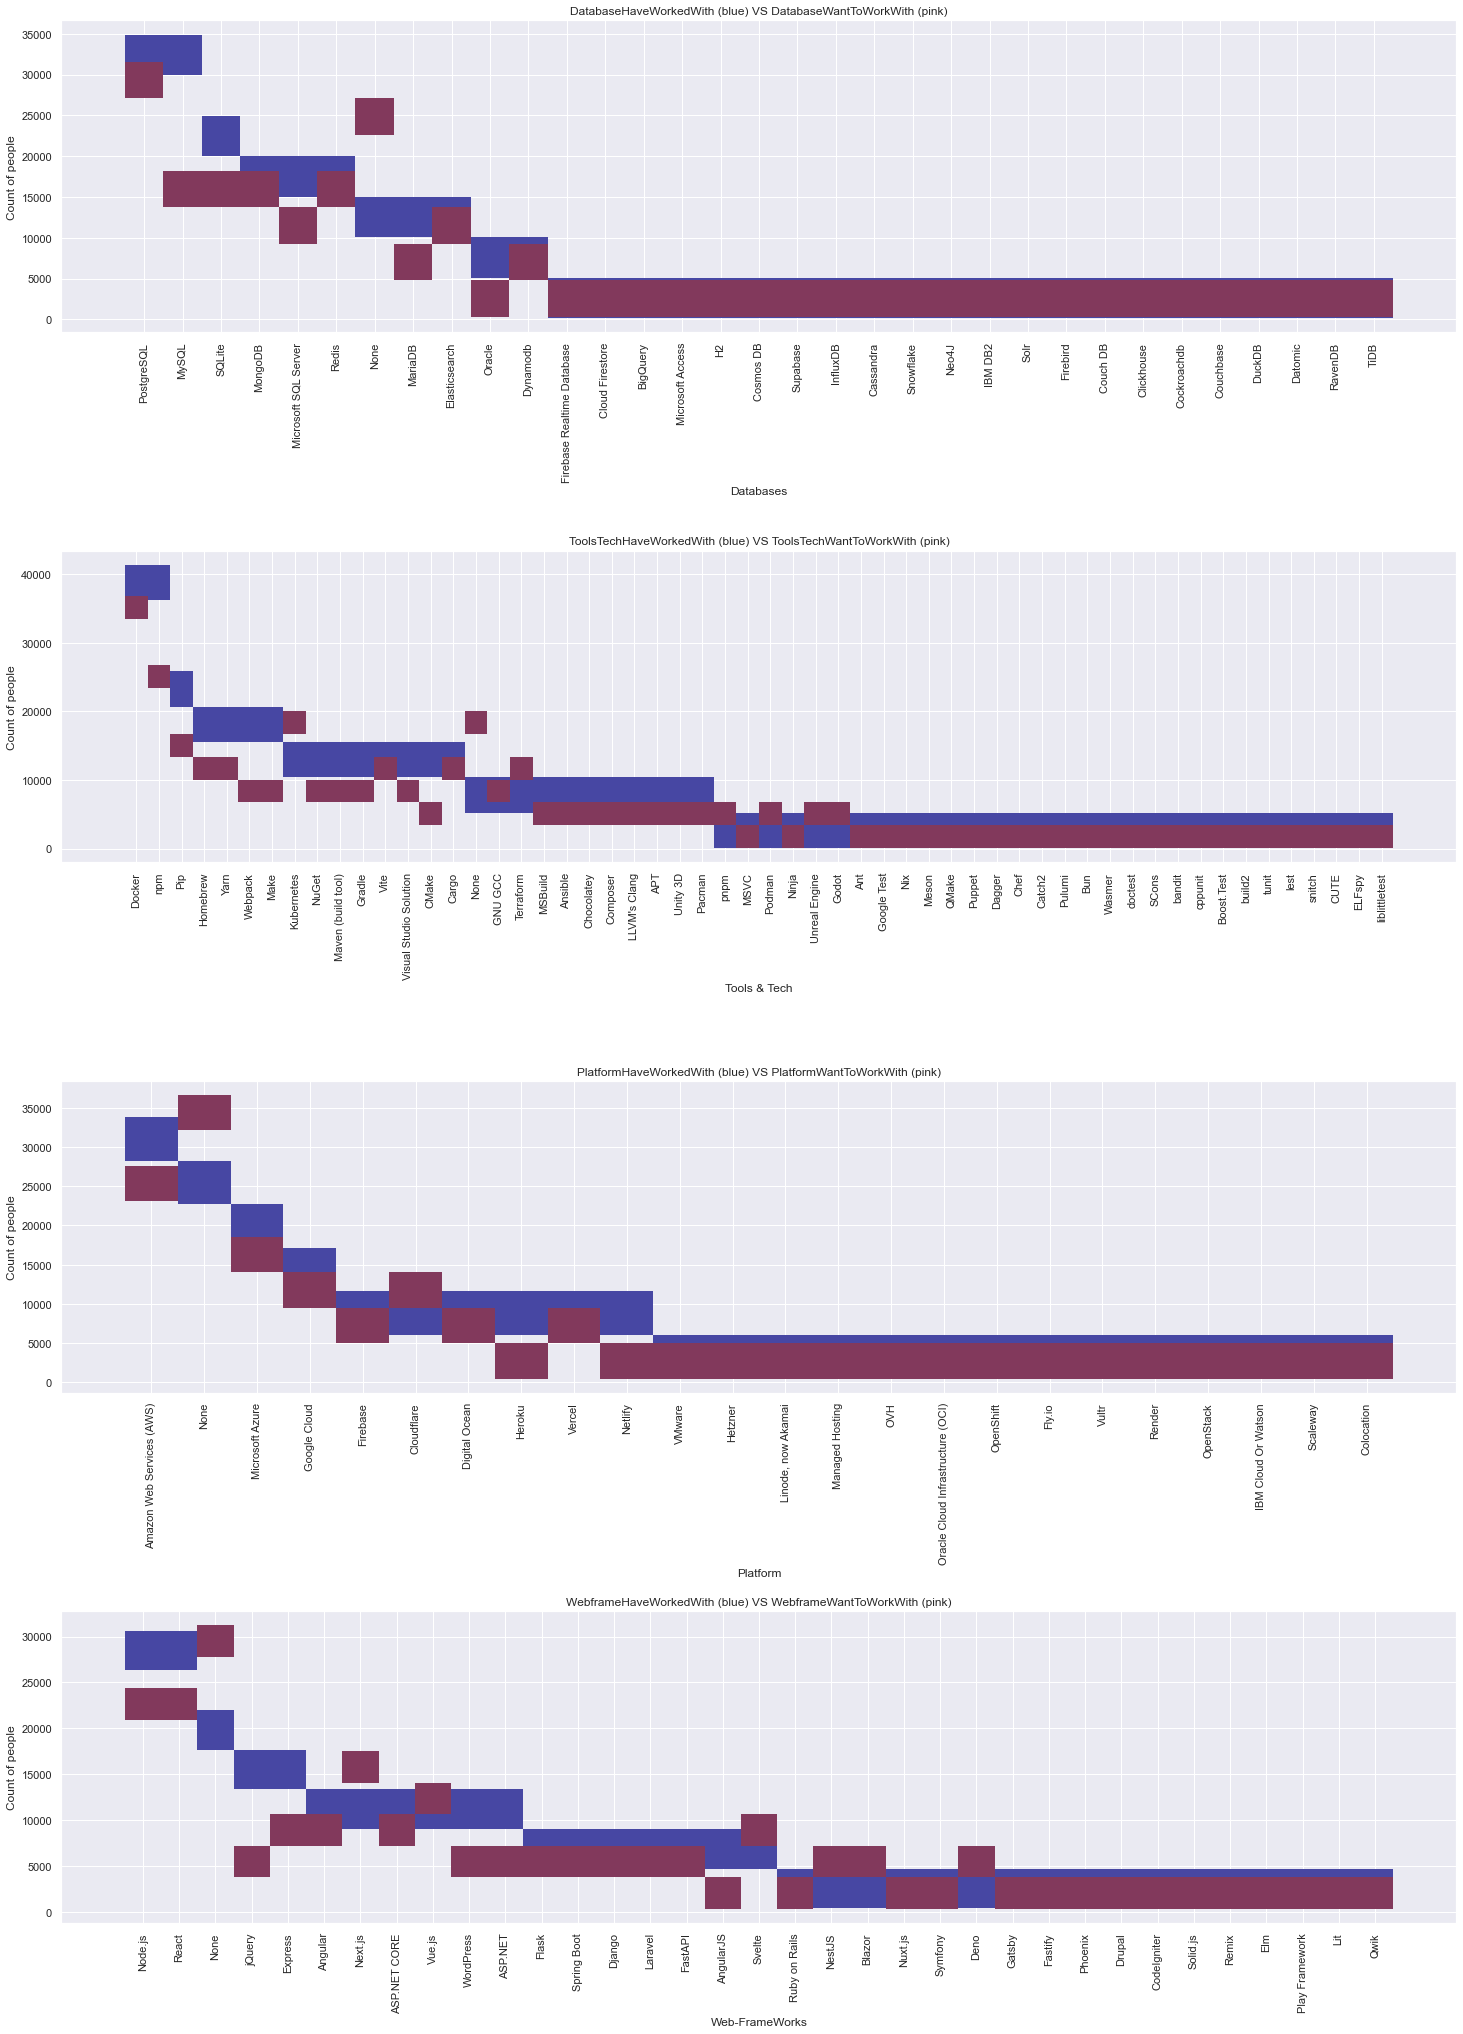

In [49]:
# plotting the graphs

plt.figure(figsize=(25,35))
plt.subplots_adjust(hspace=0.7)

plt.subplot(4,1,1)
histplotsPastFuture(survey_df['DatabaseHaveWorkedWith'], survey_df['DatabaseWantToWorkWith'], "Databases")

plt.subplot(4,1,2)
histplotsPastFuture(survey_df['ToolsTechHaveWorkedWith'], survey_df['ToolsTechWantToWorkWith'], "Tools & Tech")

plt.subplot(4,1,3)
histplotsPastFuture(survey_df['PlatformHaveWorkedWith'], survey_df['PlatformWantToWorkWith'], "Platform")

plt.subplot(4,1,4)
histplotsPastFuture(survey_df['WebframeHaveWorkedWith'], survey_df['WebframeWantToWorkWith'], "Web-FrameWorks")



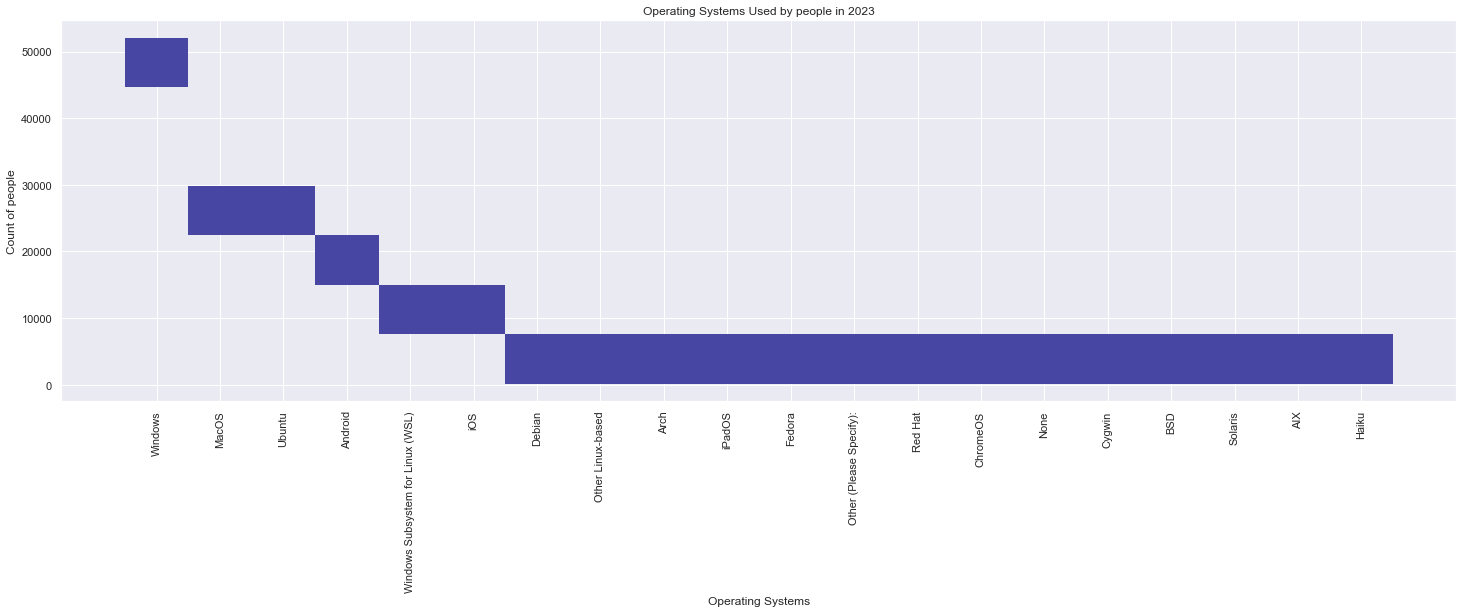

In [50]:
plt.figure(figsize=(25,7))
histplotchoices(survey_df['OperatingSysUse'], "Operating Systems", "Operating Systems Used by people in 2023")


In [51]:
# function to flatten a list
def flatList(li):
    fl = [item for sublist in li for item in sublist]
    return fl


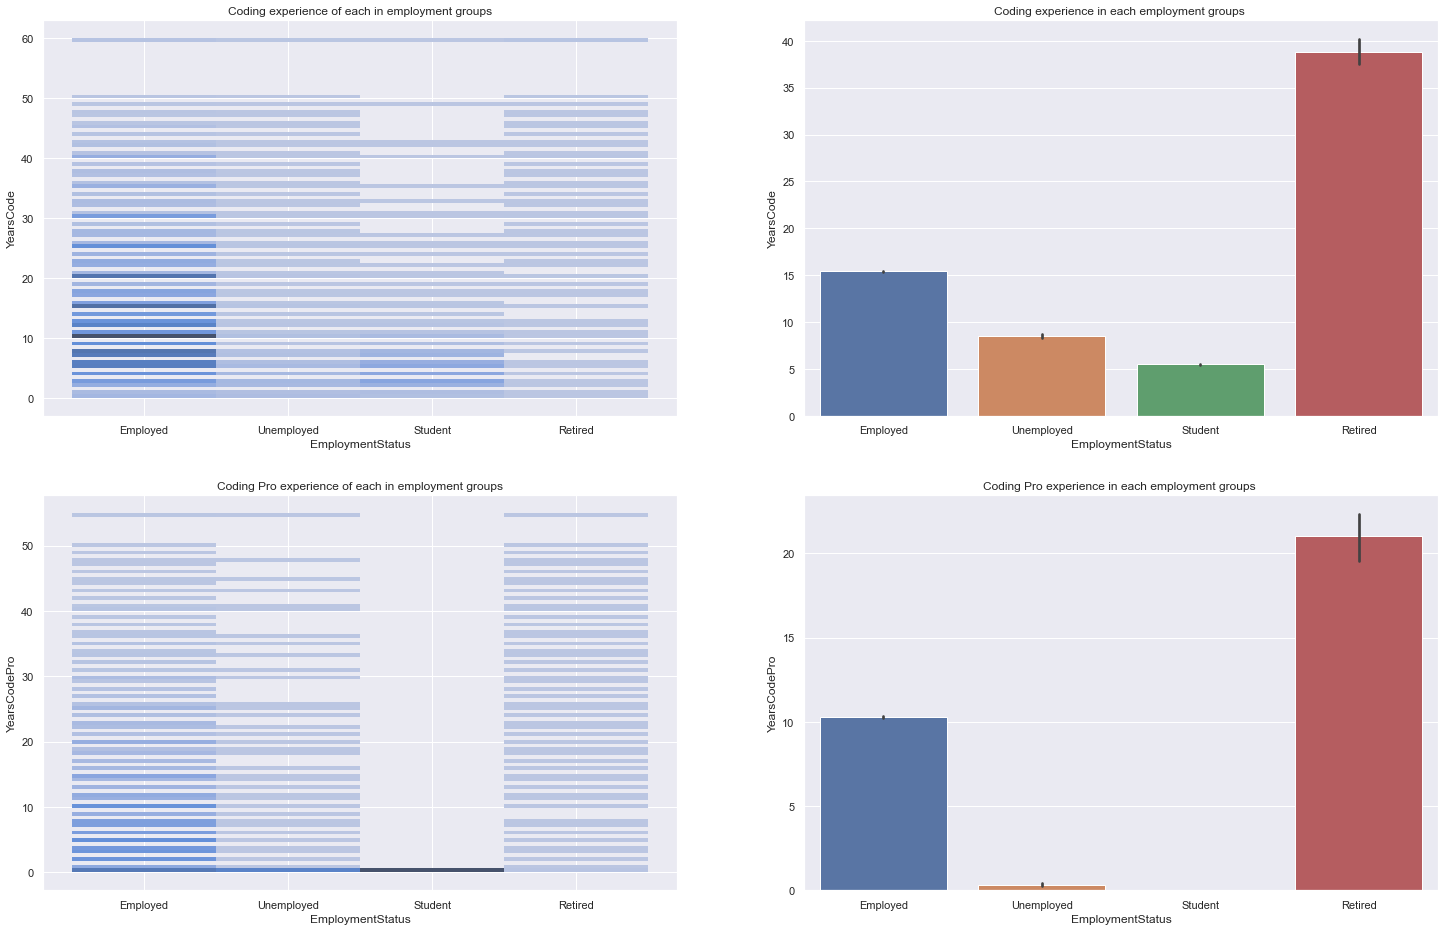

In [52]:
# analysing the employment status with respect to various factors like coding years...

plt.figure(figsize=(25,16))

plt.subplot(2,2,1)
sns.histplot(data=survey_df, x=survey_df['EmploymentStatus'], y=survey_df['YearsCode'])
plt.title("Coding experience of each in employment groups")

plt.subplot(2,2,2)
sns.barplot(data=survey_df, x=survey_df['EmploymentStatus'], y=survey_df['YearsCode'])
plt.title("Coding experience in each employment groups ")

plt.subplot(2,2,3)
sns.histplot(data=survey_df, x=survey_df['EmploymentStatus'], y=survey_df['YearsCodePro'])
plt.title("Coding Pro experience of each in employment groups")

plt.subplot(2,2,4)
sns.barplot(data=survey_df, x=survey_df['EmploymentStatus'], y=survey_df['YearsCodePro'])
plt.title("Coding Pro experience in each employment groups ")

plt.show()

In the above graph left side is the plot for each entry record for the respective employment status. However, on RHS we have the mean of each of the groups plotted as the bar graph. Moreover, if you notice left side graph is more denser towards the mean if the sample size is large which is in case of employed.  
We can see that most professional coding experienced programmers are retired and mostly 11 years of professional coders are emplyed full time. and on an average 15-16 years of coding with 10-11 years of professional coding included in that leads to more towards the employment.

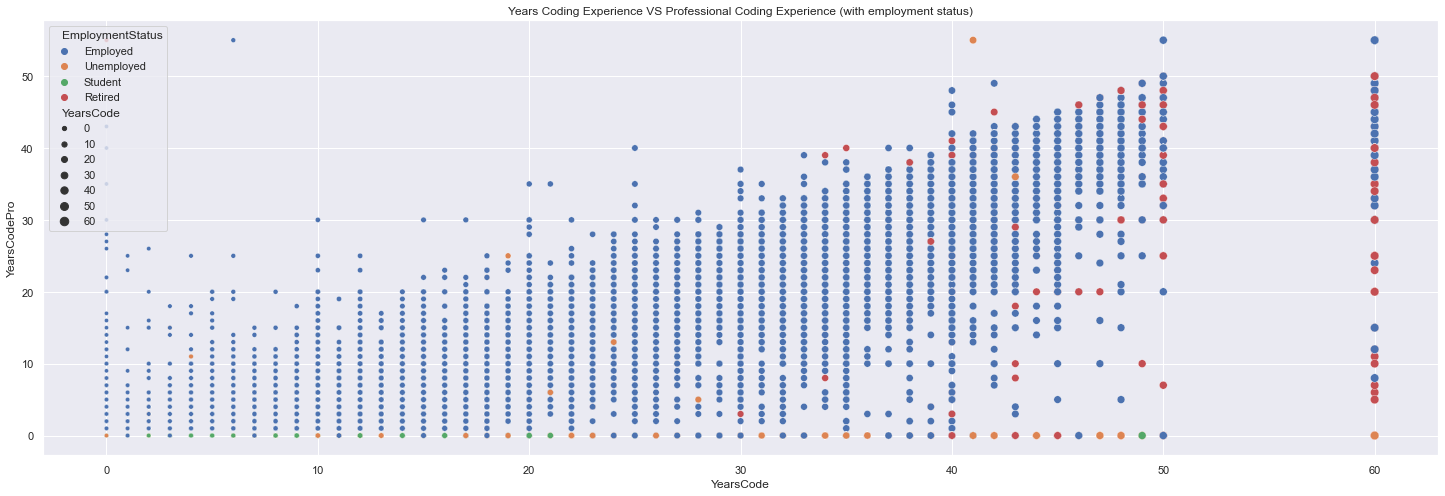

In [53]:
plt.figure(figsize=(25,8))

sns.scatterplot(data=survey_df, x=survey_df['YearsCode'], y=survey_df['YearsCodePro'], size=survey_df['YearsCode'], hue=survey_df['EmploymentStatus'])
plt.title("Years Coding Experience VS Professional Coding Experience (with employment status)")
plt.show()

Now, I want to know with respect to the coding activities selected by people what are the percentages reflected on other conditions in the survey.

In [54]:
countingValues(survey_df['CodingActivities'])

{'Hobby': 51942,
 'Contribute to open-source projects': 18231,
 'Bootstrapping a business': 10293,
 'Professional development or self-paced learning from online courses': 26957,
 'None': 14209,
 'I don’t code outside of work': 8809,
 'Freelance/contract work': 14258,
 'School or academic work': 8636,
 'Other (please specify):': 1182}

In [55]:
# percentage of people who are employed with respect to their coding activity

total_rows=survey_df.shape[0]
df=survey_df.loc[survey_df['EmploymentStatus']=='Employed']
items=list(countingValues(survey_df['CodingActivities']).keys())
itemTotal=[]

def countRecords(col):
    itemCount=0
    for i in items:
        for j in col:
            if (i in j):
                itemCount+=1
        itemTotal.append(itemCount)
        itemCount=0

countRecords(df['CodingActivities'])
itemTotal=np.array(itemTotal)
itemTotal=(itemTotal/total_rows)*100


# plotting the graph
plt.figure(figsize=(25,8))
plotDf= {"codingActivity":items, "percentageEmployed":itemTotal}
plotDf= pd.DataFrame(plotDf)
plotDf

,codingActivity,percentageEmployed
0,Hobby,55.337433
1,Contribute to open-source projects,19.263865
2,Bootstrapping a business,11.035204
3,Professional development or self-paced learnin...,29.030498
4,None,0.932104
5,I don’t code outside of work,9.931456
6,Freelance/contract work,14.911393
7,School or academic work,6.786173
8,Other (please specify):,1.256067


<Figure size 1800x576 with 0 Axes>

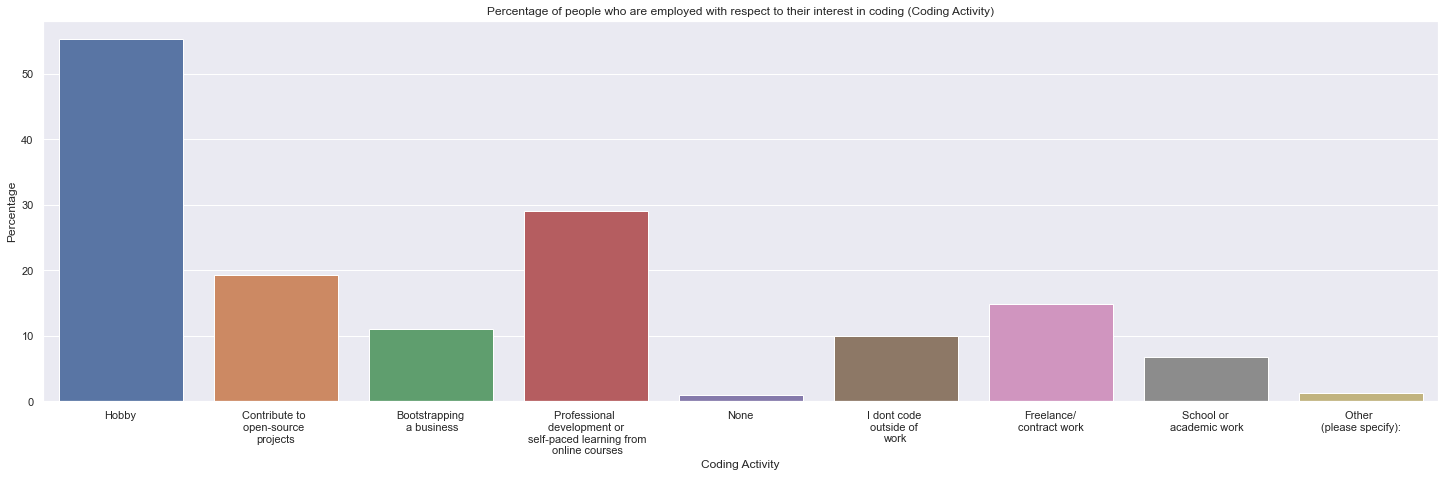

In [56]:
plt.figure(figsize=(25,7))
plot = sns.barplot(data=plotDf, x=plotDf['codingActivity'], y=plotDf['percentageEmployed'])

plot.set_xticklabels(['Hobby', 'Contribute to \nopen-source \nprojects', 'Bootstrapping\n a business', 
                     'Professional \ndevelopment or\n self-paced learning from\n online courses', 'None', 'I dont code \noutside of \nwork', 
                     'Freelance/\ncontract work', 'School or\n academic work', 'Other \n(please specify):'])

plt.title("Percentage of people who are employed with respect to their interest in coding (Coding Activity)")
plt.ylabel("Percentage")
plt.xlabel("Coding Activity")
plt.show()

So out of every developer I can say that either most of the employed people are hobbiest or develop their hobby as a programmer to be succefullly employed or I can say that you need to be a hobbiest to get employed.

**Note:** The coding activity column is a checkBox column so people can select the multiple choices at a time, thus the result of percentage is not sum upto 100. Moreover, it is more than 100% because there are many people who have selected multiple options.

## STATISTICAL ANALYSIS

In [57]:
import math
import statistics as st
import scipy as sp
from scipy import stats
from pylab import *

In [58]:
survey_df.describe()

,MedianAge,YearsCode,YearsCodePro,AnnualCompensation,WorkExp,ConvertedCompYearly
count,87973.000000,87973.000000,87973.000000,8.797300e+04,87973.000000,8.797300e+04
mean,32.538313,13.917554,8.452559,5.683562e+41,9.183954,5.628139e+04
std,10.967271,10.717933,9.388347,1.685758e+44,9.763757,5.060465e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,29.000000,6.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
50%,29.000000,10.000000,6.000000,3.600000e+04,6.000000,1.399800e+04
75%,39.000000,20.000000,13.000000,1.260000e+05,14.000000,8.042500e+04
max,65.000000,60.000000,55.000000,5.000000e+46,55.000000,7.435143e+07


plotting the distribution plots for all the numerical columns

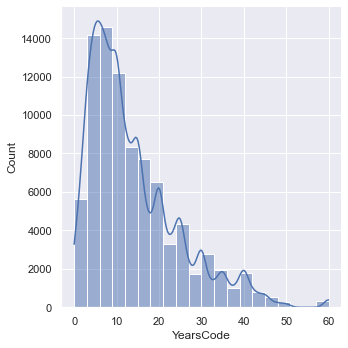

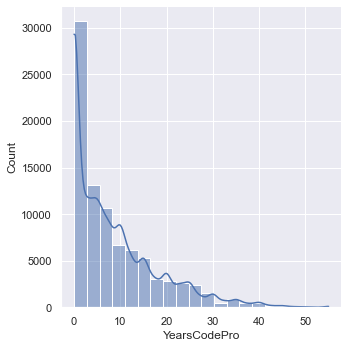

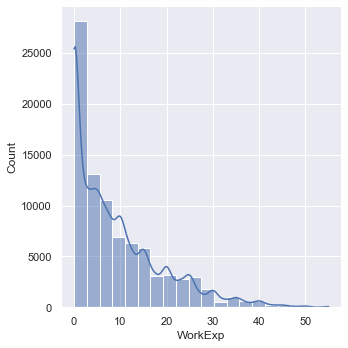

In [59]:
# this is the raw distribution plot to show how the data in the respective column is distributed

sns.displot(survey_df['YearsCode'],bins=20, kde=True)
sns.displot(survey_df['YearsCodePro'], bins=20, kde=True)
sns.displot(survey_df['WorkExp'], bins=20, kde=True)

plt.show()

plotting the probability distribution function (PDF) of numerical columns

In [60]:
# function to plot the pdf

def pdfPlotter(col):
    loc, scale= stats.norm.fit(col)  #here loc and scale are the mean and std of the data as these are the tendencies within which i have to fit the distribution
    pdf1= stats.norm.pdf(col, loc=loc, scale=scale)
    sns.lineplot(x=col, y=pdf1)
    plt.ylabel("PDF")
    plt.title(f"Probability distribution function of {col.name}")

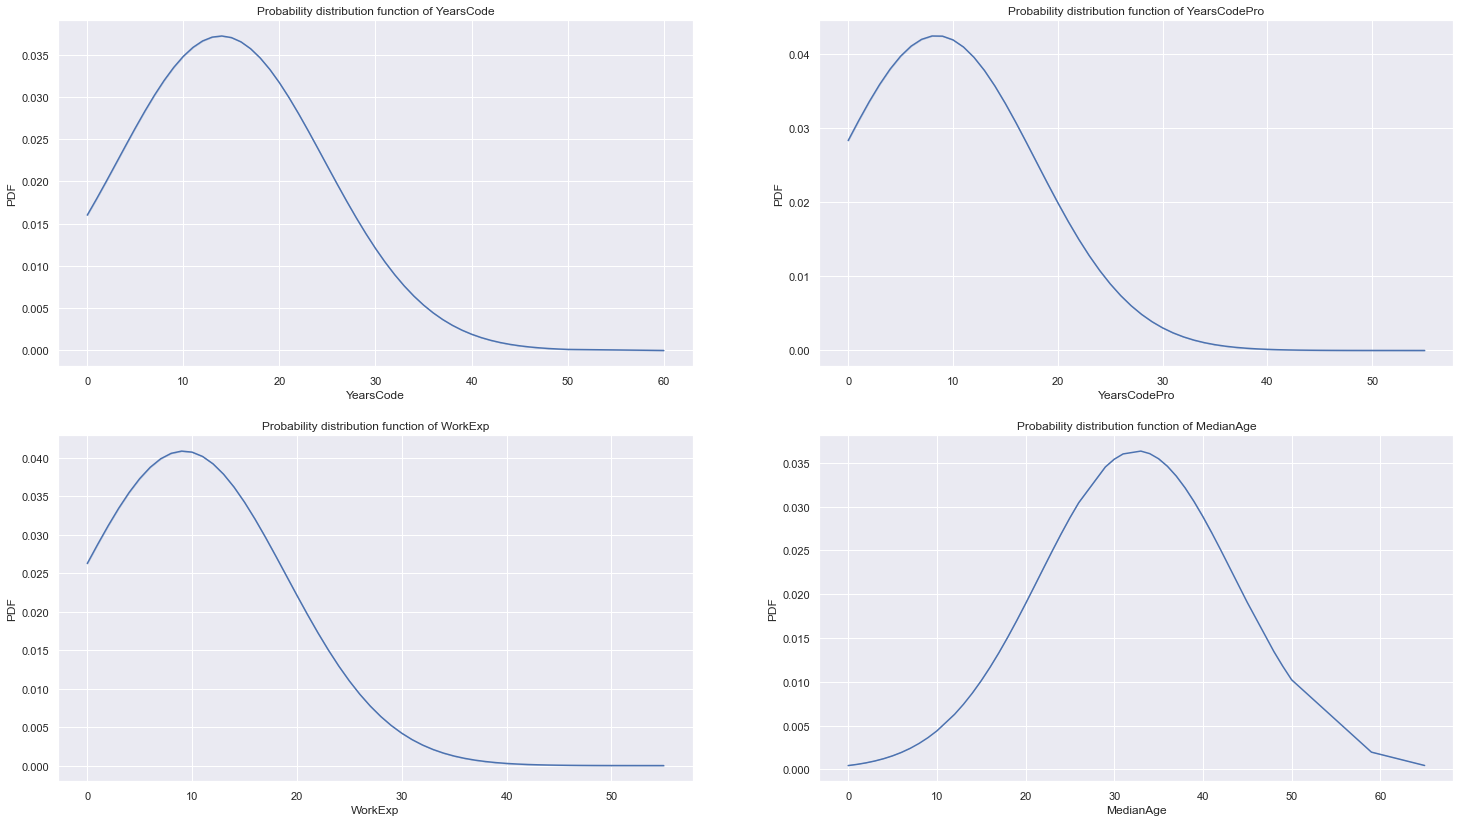

In [61]:

plt.figure(figsize=(25,14))

plt.subplot(2,2,1)
pdfPlotter(survey_df['YearsCode'])

plt.subplot(2,2,2)
pdfPlotter(survey_df['YearsCodePro'])

plt.subplot(2,2,3)
pdfPlotter(survey_df['WorkExp'])

plt.subplot(2,2,4)
pdfPlotter(survey_df['MedianAge'])



Plotting the Cumulative Density Function (CDF) 

In [62]:
# function to plot the cdf

def cdfPlotter(col):
    loc, scale= stats.norm.fit(col)  #here loc and scale are the mean and std of the data as these are the tendencies within which i have to fit the distribution
    pdf1= stats.norm.cdf(col, loc=loc, scale=scale)
    sns.lineplot(x=col, y=pdf1)
    plt.ylabel("CDF = P(x <= X)")
    plt.title(f"Cumulative distribution function of {col.name}")

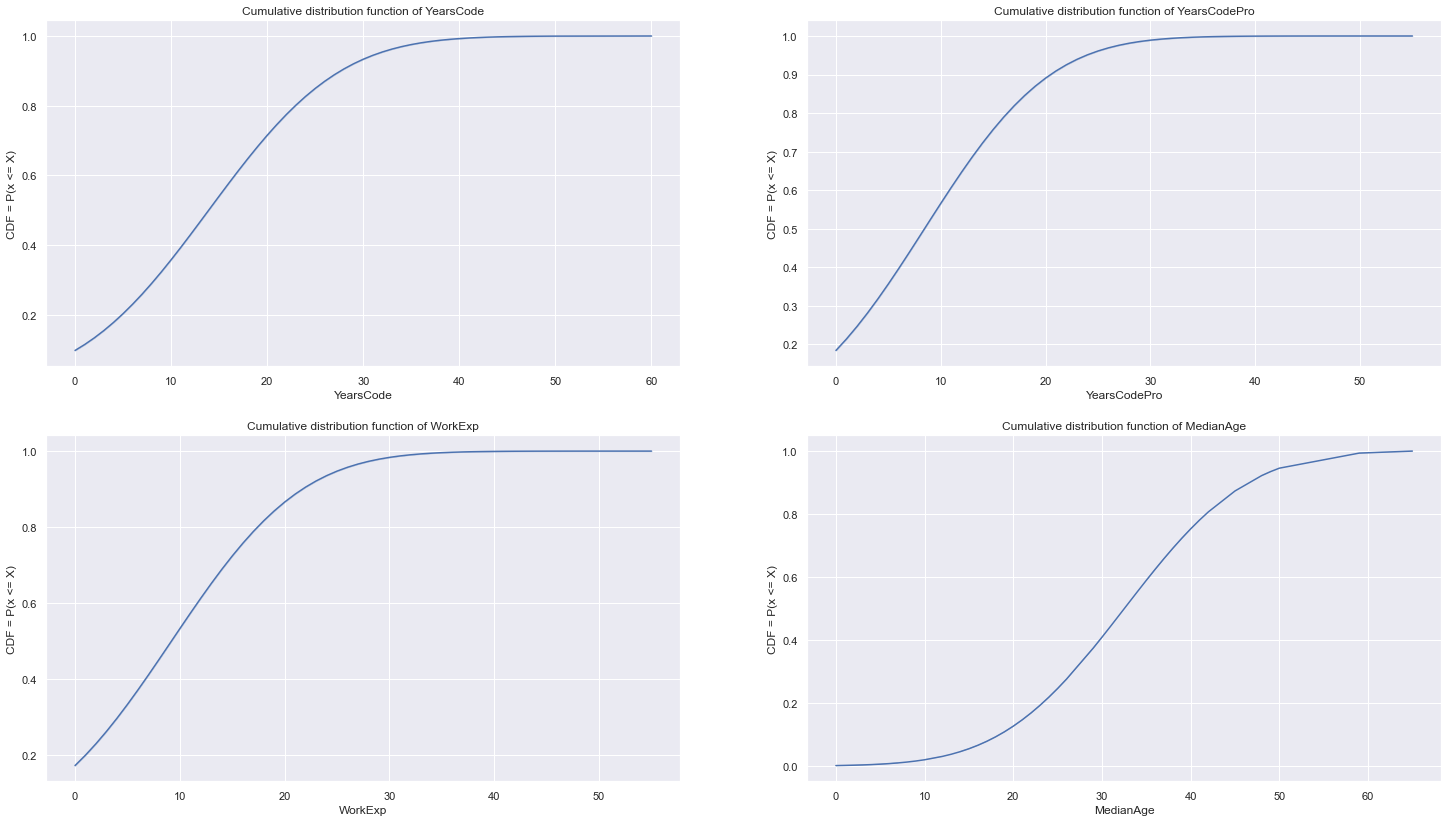

In [63]:

plt.figure(figsize=(25,14))

plt.subplot(2,2,1)
cdfPlotter(survey_df['YearsCode'])

plt.subplot(2,2,2)
cdfPlotter(survey_df['YearsCodePro'])

plt.subplot(2,2,3)
cdfPlotter(survey_df['WorkExp'])

plt.subplot(2,2,4)
cdfPlotter(survey_df['MedianAge'])

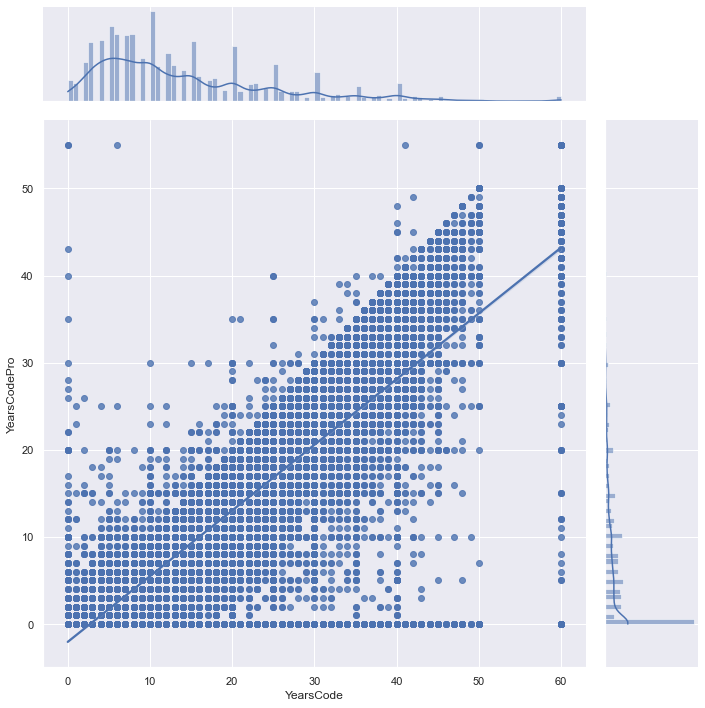

In [64]:
# knowing the relation between the years code vs Years code Pro

sns.jointplot(x=survey_df['YearsCode'], y=survey_df['YearsCodePro'], data=survey_df, height=10, kind="reg")
plt.show()

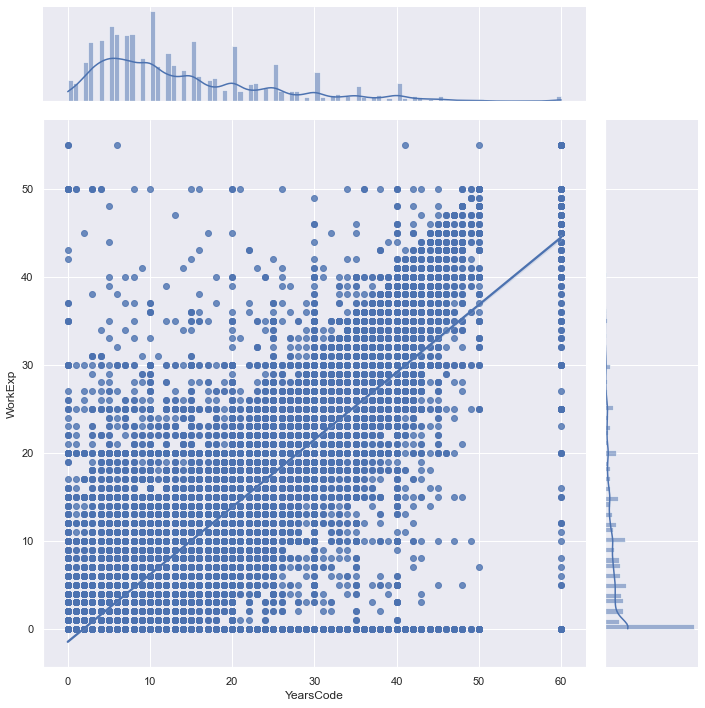

In [65]:
# knowing the relation between the Years code and the work experience with the help of linear reg

sns.jointplot(x=survey_df['YearsCode'], y=survey_df['WorkExp'], data=survey_df, height=10, kind="reg")
plt.show()

in the similar way we can also find the linear relation between the other numerica columns like mediaAge and WorkExp

## HYPOTHESIS TESTING

#### hypothesis 1
I want to find out weather the most of the data in the yearcode and yearcodepro are same or not, that weather every person is coding professionally since the begining? 

Null hypothesis: sampleMean(yearsCodePro)= mean(yearsCode)

Alt Hypothesis: sampleMean(yearsCodePro) != mean(yearsCode)

In [66]:
# taking out the t test with sample data= YearsCodePro and mean of the actual data which is years code
sample= survey_df.sample(10000) #sample of 10000 records to analyse the hypothesis
stats.ttest_ind(a=sample['YearsCodePro'], b=survey_df['YearsCode'])

TtestResult(statistic=-49.49109441264395, pvalue=0.0, df=97971.0)

Here the P value is 0.0 which is less than 0.05 thus we can reject the null Hypothesis. Thus that wasn't the case that individuals are coding professionally from the start.

#### Hypothesis 2
I want to know do people have filled their work experience as the years they have coded professionally or is the case different.

Null Hypothesis: Work experience is equivalent to the years coded professionally--

Alt Hypothesis: Work experience is not equivalent to the years coded professionally.

In [80]:
a1= stats.ttest_1samp(a=survey_df['WorkExp'], popmean=sample['YearsCodePro'].mean())
a2= stats.ttest_1samp(a=survey_df['YearsCodePro'], popmean=sample['WorkExp'].mean())

print("pValue 1=",a1[1])
print("pValue 2=",a2[1])

if(a1[1]<0.05 and a2[1]<0.05):
    print("\nNull Hypothesis is rejected")
else:
    print("\nNull Hypothesis is accepted")

pValue 1= 3.7353129429453555e-129
pValue 2= 9.21858953035532e-96

Null Hypothesis is rejected


Thus we can conclude that even though work experience is closely related to YearsCodePro, however it is not equivalent.